# CNN Model for Stock market Ratio Prediction

## Packages 

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from numpy import array 
##Removes warning for chained assignments
pd.options.mode.chained_assignment = None  # default='warn'

2022-09-03 11:06:49.458950: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-03 11:06:49.459001: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Import Data


In [4]:
df = pd.read_csv('../raw_data/ratios.csv')
df

,Date,ALB_ZBRA,NRG_CPRT,DE_BXP,NRG_STE,NRG_XRAY,SO_NLOK,PEG_O
0,2020-08-31,0.311845,0.310544,2.548054,0.203834,0.727693,2.136432,0.882281
1,2020-09-01,0.332974,0.306303,2.687319,0.203522,0.722940,2.094566,0.855546
2,2020-09-02,0.332368,0.315056,2.629334,0.204743,0.734758,2.125291,0.872526
3,2020-09-03,0.339772,0.310060,2.534974,0.201707,0.728923,2.210971,0.848504
4,2020-09-04,0.356920,0.300754,2.536138,0.199887,0.707646,2.152835,0.854765
...,...,...,...,...,...,...,...,...
492,2022-08-15,0.813028,0.321488,4.111073,0.197467,1.123670,3.277218,0.920803
493,2022-08-16,0.814154,0.323634,4.118669,0.200499,1.158238,3.283272,0.933379
494,2022-08-17,0.815450,0.327442,4.154118,0.201342,1.191888,3.347435,0.935173
495,2022-08-18,0.816374,0.333768,4.222490,0.204492,1.196920,3.371537,0.950678


126 days of stock prices ratios for 231 different stock pairs, will build model to look at first ratio. 

## First Ratio

In [1]:
A = df[['Date','NRG_CPRT']]
A.set_index('Date',inplace=True)
A.rename(columns = {'NRG_CPRT': 'Ratio'},inplace=True)
A

NameError: name 'df' is not defined

### Feature engineering 

The CNN model can be used to model the ratios but we first have to pre-process the data into a format the model will understand this consists of a series of smaller samples for this I will start with using the Monday to Friday 

In [7]:
# Create columns for previous week Ratio Column is now the target.

for i in range(1,21):
    A[f't-{i}'] = A['Ratio'].shift(i)
A.dropna(inplace = True)


,Ratio,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,t-11,t-12,t-13,t-14,t-15,t-16,t-17,t-18,t-19,t-20
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-29,0.330664,0.320942,0.323581,0.327588,0.317605,0.372109,0.376984,0.376953,0.386490,0.377806,...,0.383597,0.372984,0.368015,0.367225,0.366863,0.356920,0.339772,0.332368,0.332974,0.311845
2020-09-30,0.348574,0.330664,0.320942,0.323581,0.327588,0.317605,0.372109,0.376984,0.376953,0.386490,...,0.375199,0.383597,0.372984,0.368015,0.367225,0.366863,0.356920,0.339772,0.332368,0.332974
2020-10-01,0.330732,0.348574,0.330664,0.320942,0.323581,0.327588,0.317605,0.372109,0.376984,0.376953,...,0.377806,0.375199,0.383597,0.372984,0.368015,0.367225,0.366863,0.356920,0.339772,0.332368
2020-10-02,0.340060,0.330732,0.348574,0.330664,0.320942,0.323581,0.327588,0.317605,0.372109,0.376984,...,0.386490,0.377806,0.375199,0.383597,0.372984,0.368015,0.367225,0.366863,0.356920,0.339772
2020-10-05,0.348504,0.340060,0.330732,0.348574,0.330664,0.320942,0.323581,0.327588,0.317605,0.372109,...,0.376953,0.386490,0.377806,0.375199,0.383597,0.372984,0.368015,0.367225,0.366863,0.356920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-15,0.813028,0.812049,0.790774,0.788457,0.764204,0.741221,0.717486,0.710539,0.733862,0.754330,...,0.683022,0.685980,0.692162,0.688442,0.699419,0.677911,0.679211,0.674544,0.678144,0.689156
2022-08-16,0.814154,0.813028,0.812049,0.790774,0.788457,0.764204,0.741221,0.717486,0.710539,0.733862,...,0.669475,0.683022,0.685980,0.692162,0.688442,0.699419,0.677911,0.679211,0.674544,0.678144
2022-08-17,0.815450,0.814154,0.813028,0.812049,0.790774,0.788457,0.764204,0.741221,0.717486,0.710539,...,0.754330,0.669475,0.683022,0.685980,0.692162,0.688442,0.699419,0.677911,0.679211,0.674544


In [11]:
X = []
for i in range(len(A['Ratio'])):
    arr = []
    for j in range(1,A.shape[1]):
        arr.append(A[f't-{j}'][i])
    X.append(arr)
Y = A['Ratio'].tolist()
print(len(X[1]),Y[1])

20 0.348573868982937


In [21]:
model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(20,1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mae')

In [22]:
X = array(X)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [23]:
Y = array(Y)

In [24]:
X.shape,Y.shape

((477, 20, 1), (477,))

In [25]:
X_train = X[0:457]
X_test = X[457:]
Y_train = Y[0:457]
Y_test = Y[457:]

In [26]:
X_train.shape,Y_train.shape

((457, 20, 1), (457,))

In [27]:
model.fit(X_train,Y_train, epochs=100, verbose=1)

Epoch 1/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1751
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0385
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0243
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0226
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0222
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0215
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0205
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 11/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 12/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 13/100
15/15 [=================

In [28]:
X_test[1].shape

(20, 1)

In [30]:
preds = []
for i in range(len(X_test)):    
    pred = model.predict(X_test[i].reshape(1,20,1))
    preds.append(pred[0][0])
preds

1/1 [==============================] - 0s 17ms/step


[0.66932225,
 0.68483627,
 0.6856903,
 0.6864958,
 0.6865619,
 0.6807768,
 0.6765301,
 0.7258537,
 0.74045414,
 0.73039216,
 0.72251785,
 0.7331457,
 0.74824864,
 0.76870805,
 0.78160125,
 0.80230093,
 0.81023353,
 0.8062828,
 0.80832225,
 0.8115106]

In [31]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [32]:
mape = []
for i in range(len(preds)):
    mape.append(mean_absolute_percentage_error(Y_test[i],preds[i]))
mape

[4.303128292382654,
 0.5238074405352763,
 0.9350360194599607,
 0.07523239918882177,
 0.5183266670167204,
 1.68811785632913,
 10.31377883790417,
 1.0912960264807998,
 4.210191753765767,
 1.798849591570464,
 2.523237862341296,
 4.064173838388597,
 5.099677173195483,
 2.7904053376240974,
 3.7495461867019317,
 1.3193522429973887,
 0.4815877654849963,
 1.1241984848343312,
 0.9862378729862721,
 1.3005639023181403]

In [33]:
sum(mape)/len(mape)

2.4448372775753144

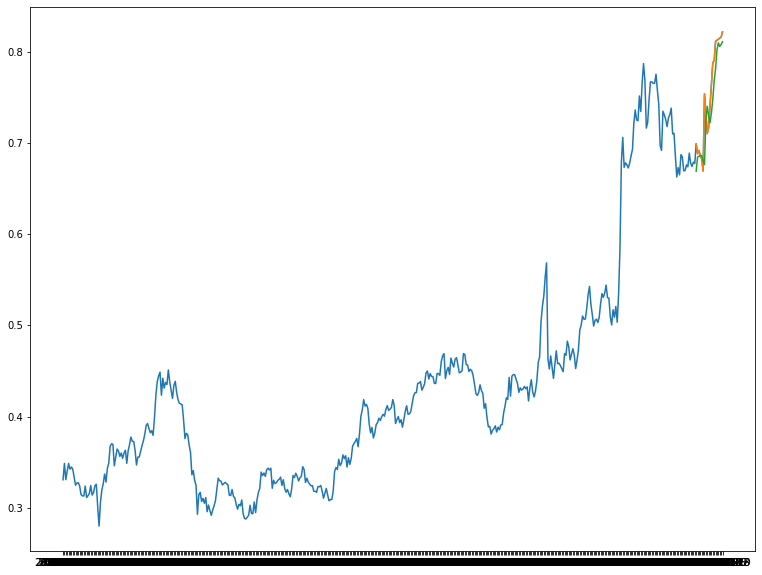

In [35]:
fig, ax = plt.subplots(1,1,figsize = (13,10))
ax.plot(A['Ratio'[0:100]])
ax.plot(A.index[-20:],Y_test)
ax.plot(A.index[-20:],preds)

In [234]:
preds

0     0.105351
1     0.105921
2     0.108092
3     0.110204
4     0.112549
5     0.114956
6     0.115385
7     0.114408
8     0.113369
9     0.111820
10    0.112946
11    0.115068
12    0.115739
13    0.117310
14    0.118816
15    0.119551
16    0.120333
17    0.119945
18    0.118010
19    0.117779
20    0.117639
dtype: float32

(21,)